In [1]:
import cifar10
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

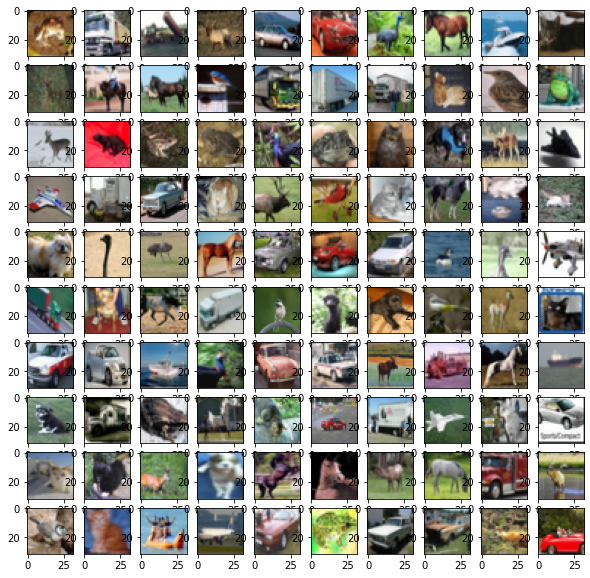

In [4]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i])
plt.show()    

In [5]:
x_train, x_test, y_train, y_test=train_test_split(labels_train,cls_train)

In [6]:
pca=PCA()

In [7]:
x_train_pca=pca.fit_transform(x_train)

In [8]:
k = 0
current_variance=0
total_sum=pca.explained_variance_.sum()
while current_variance/total_sum < 0.99:
    current_variance+=pca.explained_variance_[k]
    k+=1
k    
    

9

In [9]:
pca=PCA(n_components=k)

In [10]:
x_train_pca=pca.fit_transform(x_train)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf= LogisticRegression()

In [13]:
clf.fit(x_train_pca,y_train)

LogisticRegression()

In [14]:
x_test_pca=pca.transform(x_test)
clf.score(x_test_pca,y_test)

1.0

In [15]:
ypred=clf.predict(x_test_pca)

In [16]:
ypred

array([2, 7, 3, ..., 0, 0, 9])

In [17]:
labels_train.shape

(50000, 10)

In [18]:
data_transform=pca.transform(labels_test)

In [19]:
data_pred=clf.predict(data_transform)

In [20]:
data_pred

array([3, 8, 8, ..., 5, 1, 7])

In [21]:
import pandas as pd

In [22]:
df=pd.DataFrame(data_pred,columns=["class"])
df

,class
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


In [23]:
for i in range(10):
    df["class"].replace(i,class_names[i],inplace=True)

df    

,class
0,cat
1,ship
2,ship
3,airplane
4,frog
...,...
9995,ship
9996,cat
9997,dog
9998,automobile


In [24]:
df.to_csv("predictions1.csv",header=False,index=False)

In [25]:
data_pred

array([3, 8, 8, ..., 5, 1, 7])

In [26]:
x_train.shape

(37500, 10)